In [1]:
from patchedimage import PatchedImage
from utilities import *

81 71


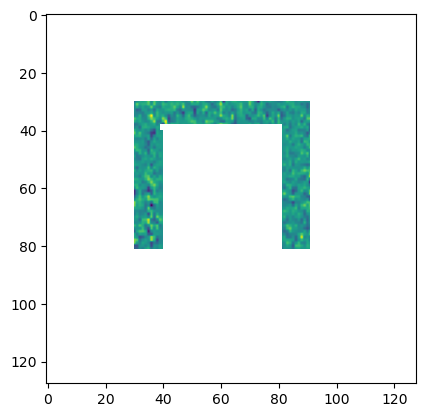

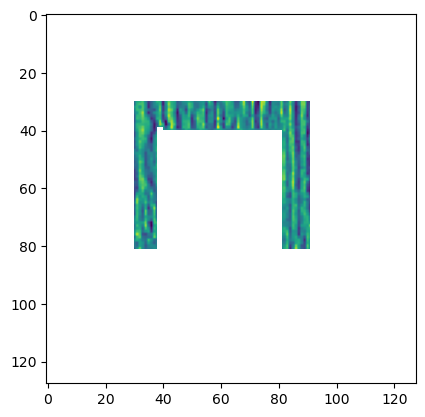

ValueError: no valid gradients found

In [2]:
imgp = PatchedImage("images/bois.tif",10)
masque = masque_carre((40,40),(80,80),imgp.img.shape)
imgp.set_masque(masque,leaf_size=128)#+masque_circulaire((20,50),15,imgp.img.shape))
imgp.set_priorities()
imgp.show_img()

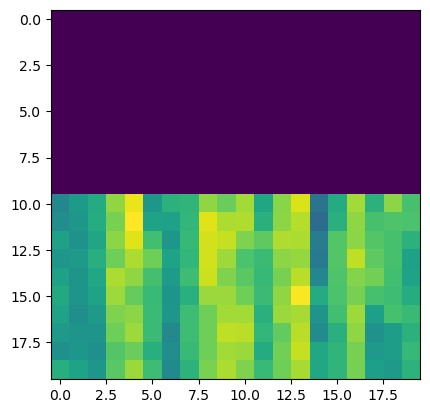

In [3]:
i,j = 81, 71
plt.imshow(imgp.img[i-10:i+10,j-10:j+10])

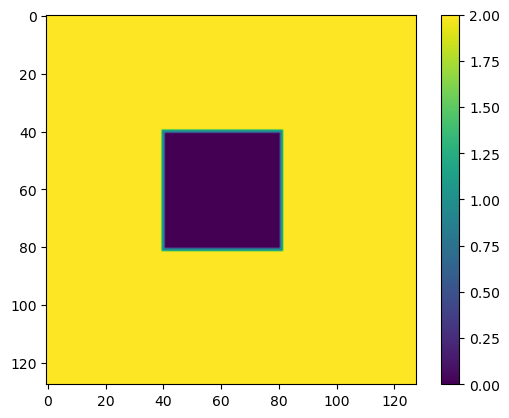

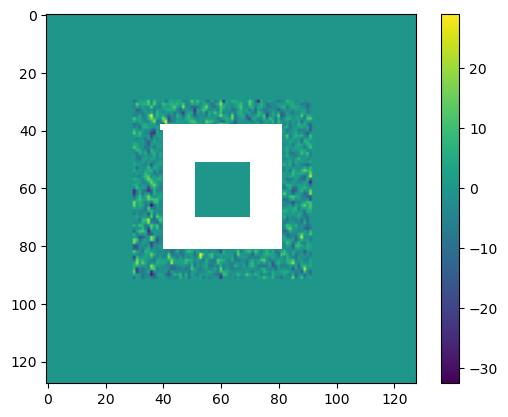

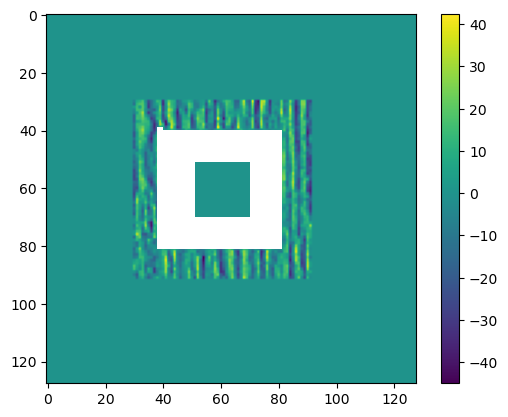

In [10]:
plt.imshow(imgp.zone)
plt.colorbar()
plt.show()
plt.imshow(imgp.gradient[0])
plt.colorbar()
plt.show()
plt.imshow(imgp.gradient[1])
plt.colorbar()
plt.show()

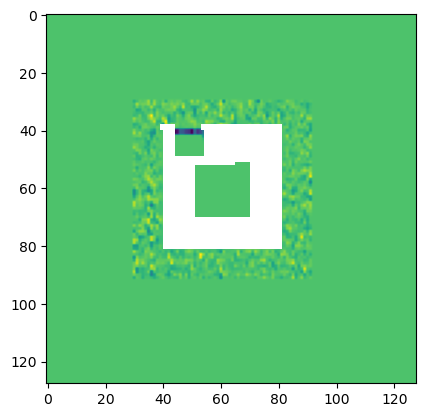

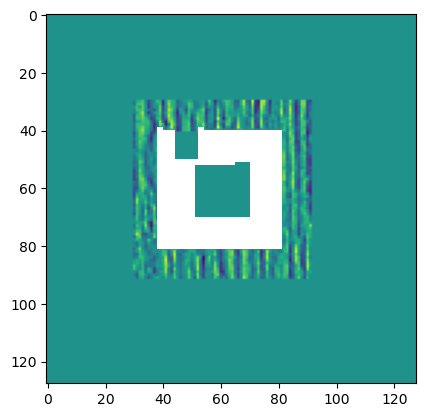

ValueError: no valid gradients found

In [4]:
i,j = imgp.find_max_priority()
imgp.reconstruction((i,j))
imgp.set_priorities()
plt.imshow(imgp.zone)

In [5]:
for k in range(200):
    break
    try:
        i,j = imgp.find_max_priority()
    except ValueError:
        break
    print(k)
    imgp.reconstruction((i,j))
    imgp.set_priorities()

0
1
2
3
4
5
6
7


KeyboardInterrupt: 

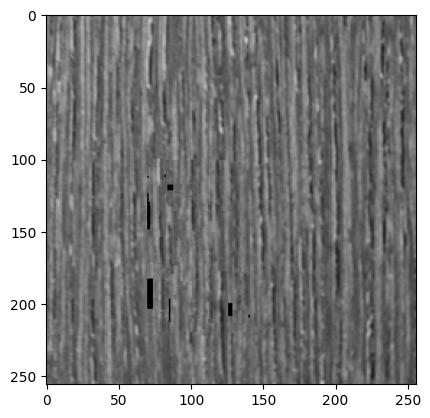

In [13]:
imgp.show_img()